In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
df = pd.read_csv("zomato.csv", encoding = 'latin-1')

In [89]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Lets fix the column names up a bit

In [90]:
df.rename(columns = {'Restaurant ID': 'restaurant_id',
                     'Restaurant_name':'restaurant_name',
                     'Country Code':'country_code',
                     'City':'city',
                     'Address':'address',
                     'Locality':'locality',
                     'Locality Verbose':'locality_verbose',
                     'Longitude':'longitude',
                     'Latitude':'latitude',
                     'Cuisines':'cuisines',
                    'Has Table booking':'has_table_booking',
                    'Has Online delivery':'has_online_delivery',
                    'Is delivering now':'is_delivering_now',
                    'Switch to order menu':'switch_to_order',
                    'Price range':'price_range',
                    'Aggregate rating':'agg_rating',
                    'Rating color':'rating_color',
                    'Rating text':'rating_text',
                    'Votes':'votes',
                    'Average Cost for two':'avg_cost',
                    'Currency':'currency'}, inplace = True)

In [91]:
df.describe()

,restaurant_id,country_code,longitude,latitude,avg_cost,price_range,agg_rating,votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


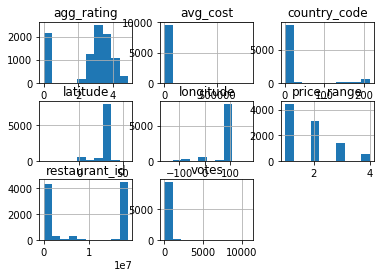

In [92]:
df.hist();

Average ratings have a clear bump on 0, this may be missing data and need to be discarded. Average cost for two also seems highly skewed and clearly need to be adjust for fx_rates. Price range makes sense, as most restaurants are on the lower end and fewer as price increases. Votes are highly skewed and will need looking into.
Lets handle the FX rates first and see how it looks.

In [124]:
fx_rates = df.currency.value_counts().reset_index()
fx_rates = fx_rates.drop(['currency'], axis = 1)
fx_rates.rename(columns = {'index':'currency'}, inplace = True)
fx_rates['usd_rate'] = [.014,1,1.2489,.2722,.2448,.0686,.6377,.1758,.0921,.000072,.005545,.2747]
fx_rates['country'] =  ['India','USA','UK','UAE','Brazil','South Africa','New Zealand','Turkey',
                        'Botswana','Indonesia','Sri Lanka','Qatar']
print(fx_rates)

                  currency  usd_rate       country
0       Indian Rupees(Rs.)  0.014000         India
1                Dollar($)  1.000000           USA
2               Pounds(£)  1.248900            UK
3       Emirati Diram(AED)  0.272200           UAE
4       Brazilian Real(R$)  0.244800        Brazil
5                  Rand(R)  0.068600  South Africa
6            NewZealand($)  0.637700   New Zealand
7         Turkish Lira(TL)  0.175800        Turkey
8         Botswana Pula(P)  0.092100      Botswana
9   Indonesian Rupiah(IDR)  0.000072     Indonesia
10   Sri Lankan Rupee(LKR)  0.005545     Sri Lanka
11         Qatari Rial(QR)  0.274700         Qatar


In [125]:
df = df.merge(fx_rates, how = 'left', on = 'currency')

In [96]:
df['usd_avg_price'] = df['avg_cost'] * df['usd_rate']

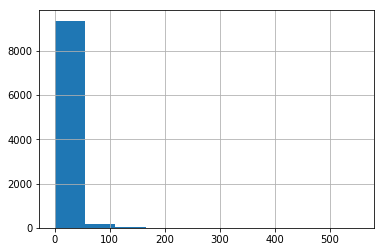

In [97]:
df['usd_avg_price'].hist()

Still looks skewed, lets dig into how it looks in the 1-50 range.

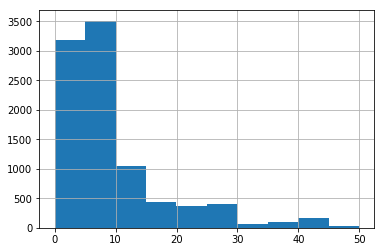

In [105]:
df['usd_avg_price'][df['usd_avg_price'] < 50].hist();

Still skewed, looks like most of these restaurants can be had for less than $10 for two!
Curious how this looks by country, lets this split histogram apart.

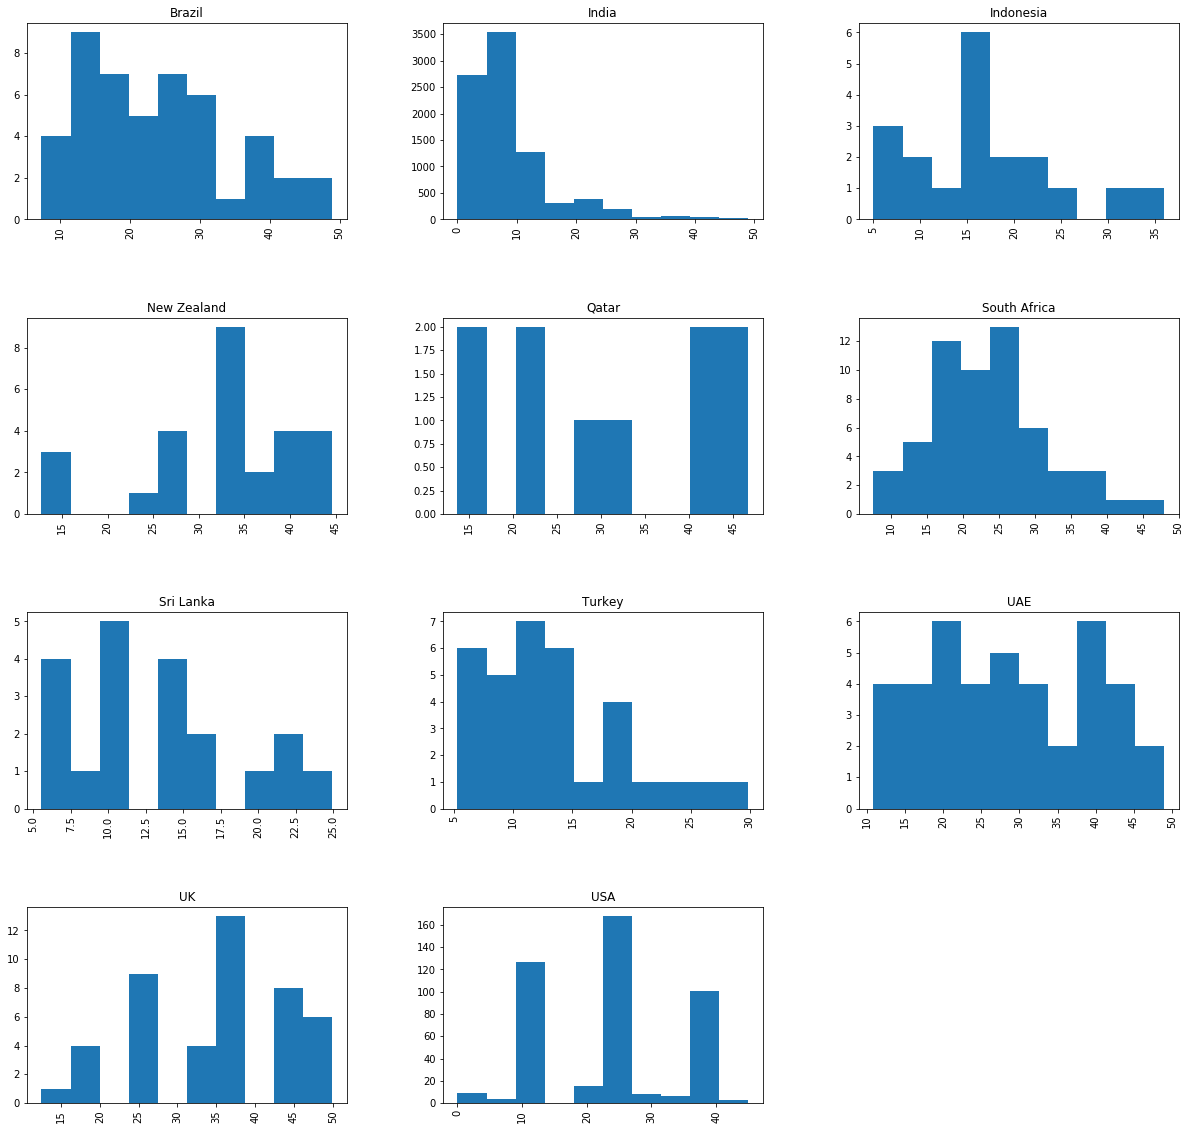

In [126]:
df[['usd_avg_price','country']][df['usd_avg_price'] < 50].hist(column = 'usd_avg_price', by= 'country', figsize = (20,20));

Lets go ahead and split the data into numerical and categorical parts

In [155]:
#Lets get rid of some of the numeric columns that don't make sense to use
def split_data(df):
    df_num = df.select_dtypes(include = ['float64','int64'])
    df_num = df_num.drop(['restaurant_id','country_code','avg_cost'], axis = 1)
    
    df_cat = df.select_dtypes(include = ['object'])
    df_cat = df_cat.drop(['rating_color','rating_text','locality','locality_verbose','address','currency',
                         'Restaurant Name','city'], axis = 1)
    
    return df_num, df_cat
    

In [156]:
df_num, df_cat = split_data(df)
df_cat.head()

,cuisines,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order,country
0,"French, Japanese, Desserts",Yes,No,No,No,Botswana
1,Japanese,Yes,No,No,No,Botswana
2,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,Botswana
3,"Japanese, Sushi",No,No,No,No,Botswana
4,"Japanese, Korean",Yes,No,No,No,Botswana


Lets look at these categorical variables and what we will do with each

In [154]:
print(df_cat.country.value_counts())

India           8652
USA              482
UK                80
Brazil            60
UAE               60
South Africa      60
New Zealand       40
Turkey            34
Botswana          22
Indonesia         21
Qatar             20
Sri Lanka         20
Name: country, dtype: int64


The vast majority are in India, lets see if the model works if we turn each country into a dummy variable. We can consider further regionalizing the data to make larger groups later.

In [158]:
df_cat.cuisines.value_counts()

North Indian                                                              936
North Indian, Chinese                                                     511
Chinese                                                                   354
Fast Food                                                                 354
North Indian, Mughlai                                                     334
Cafe                                                                      299
Bakery                                                                    218
North Indian, Mughlai, Chinese                                            197
Bakery, Desserts                                                          170
Street Food                                                               149
Pizza, Fast Food                                                          131
Chinese, Fast Food                                                        118
Mithai, Street Food                                             

Wow, thats a lot of cuisine types, lets see if we can wrangle this into a more reasonable dummy sequence

In [174]:
def individual_values(df_cat):
    cols = df_cat.cuisines.str.split(pat = ', ')
    unique_vals = cols.apply(pd.Series).stack().unique()
    
    return unique_vals

cuisine_types = []
cols[0][2]

'Desserts'

In [175]:
vals = individual_values(df_cat)

In [177]:
print(vals)

['French' 'Japanese' 'Desserts' 'Seafood' 'Asian' 'Filipino' 'Indian'
 'Sushi' 'Korean' 'Chinese' 'European' 'Mexican' 'American' 'Ice Cream'
 'Cafe' 'Italian' 'Pizza' 'Bakery' 'Mediterranean' 'Fast Food' 'Brazilian'
 'Arabian' 'Bar Food' 'Grill' 'International' 'Peruvian' 'Latin American'
 'Burger' 'Juices' 'Healthy Food' 'Beverages' 'Lebanese' 'Sandwich'
 'Steak' 'BBQ' 'Gourmet Fast Food' 'Mineira' 'North Eastern'
 'Coffee and Tea' 'Vegetarian' 'Tapas' 'Breakfast' 'Diner' 'Southern'
 'Southwestern' 'Spanish' 'Argentine' 'Caribbean' 'German' 'Vietnamese'
 'Thai' 'Modern Australian' 'Teriyaki' 'Cajun' 'Canadian' 'Tex-Mex'
 'Middle Eastern' 'Greek' 'Bubble Tea' 'Tea' 'Australian' 'Fusion' 'Cuban'
 'Hawaiian' 'Salad' 'Irish' 'New American' 'Soul Food' 'Turkish'
 'Pub Food' 'Persian' 'Continental' 'Singaporean' 'Malay' 'Cantonese'
 'Dim Sum' 'Western' 'Finger Food' 'British' 'Deli' 'Indonesian'
 'North Indian' 'Mughlai' 'Biryani' 'South Indian' 'Pakistani' 'Afghani'
 'Hyderabadi' 'Rajasth

In [ ]:
def get_cat_dum(df_cat):
    df_cat_dum = df_cat.get_dummies()

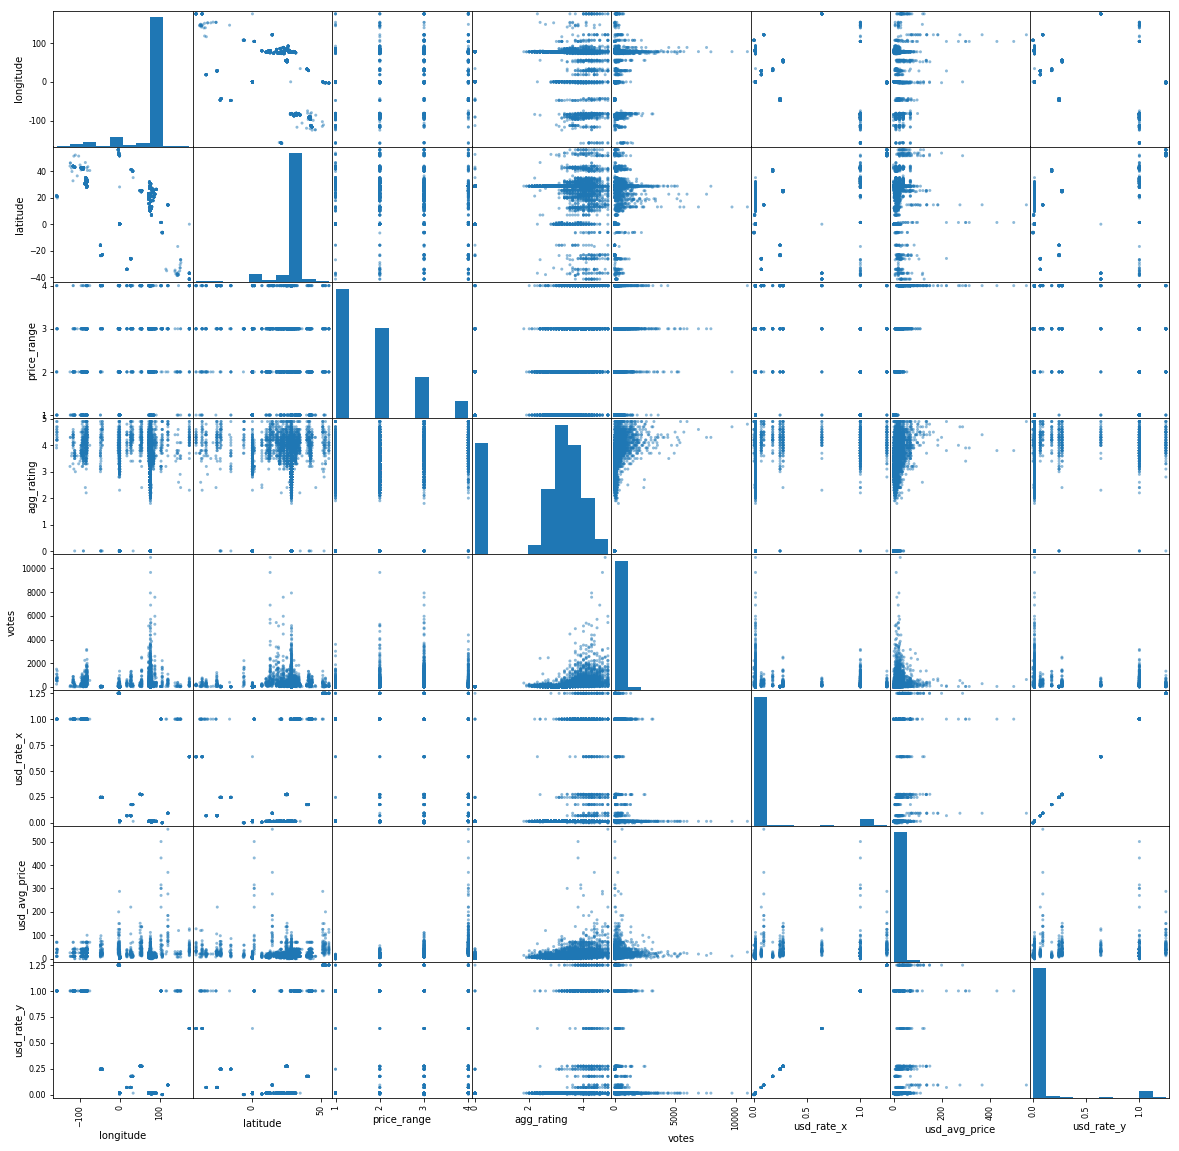

In [149]:
scatter_matrix(df_num, figsize = (20,20));

Since I've never done a direct comparison, lets look at how the Seaborn pairplot matches up to pandas scatter_matrix.

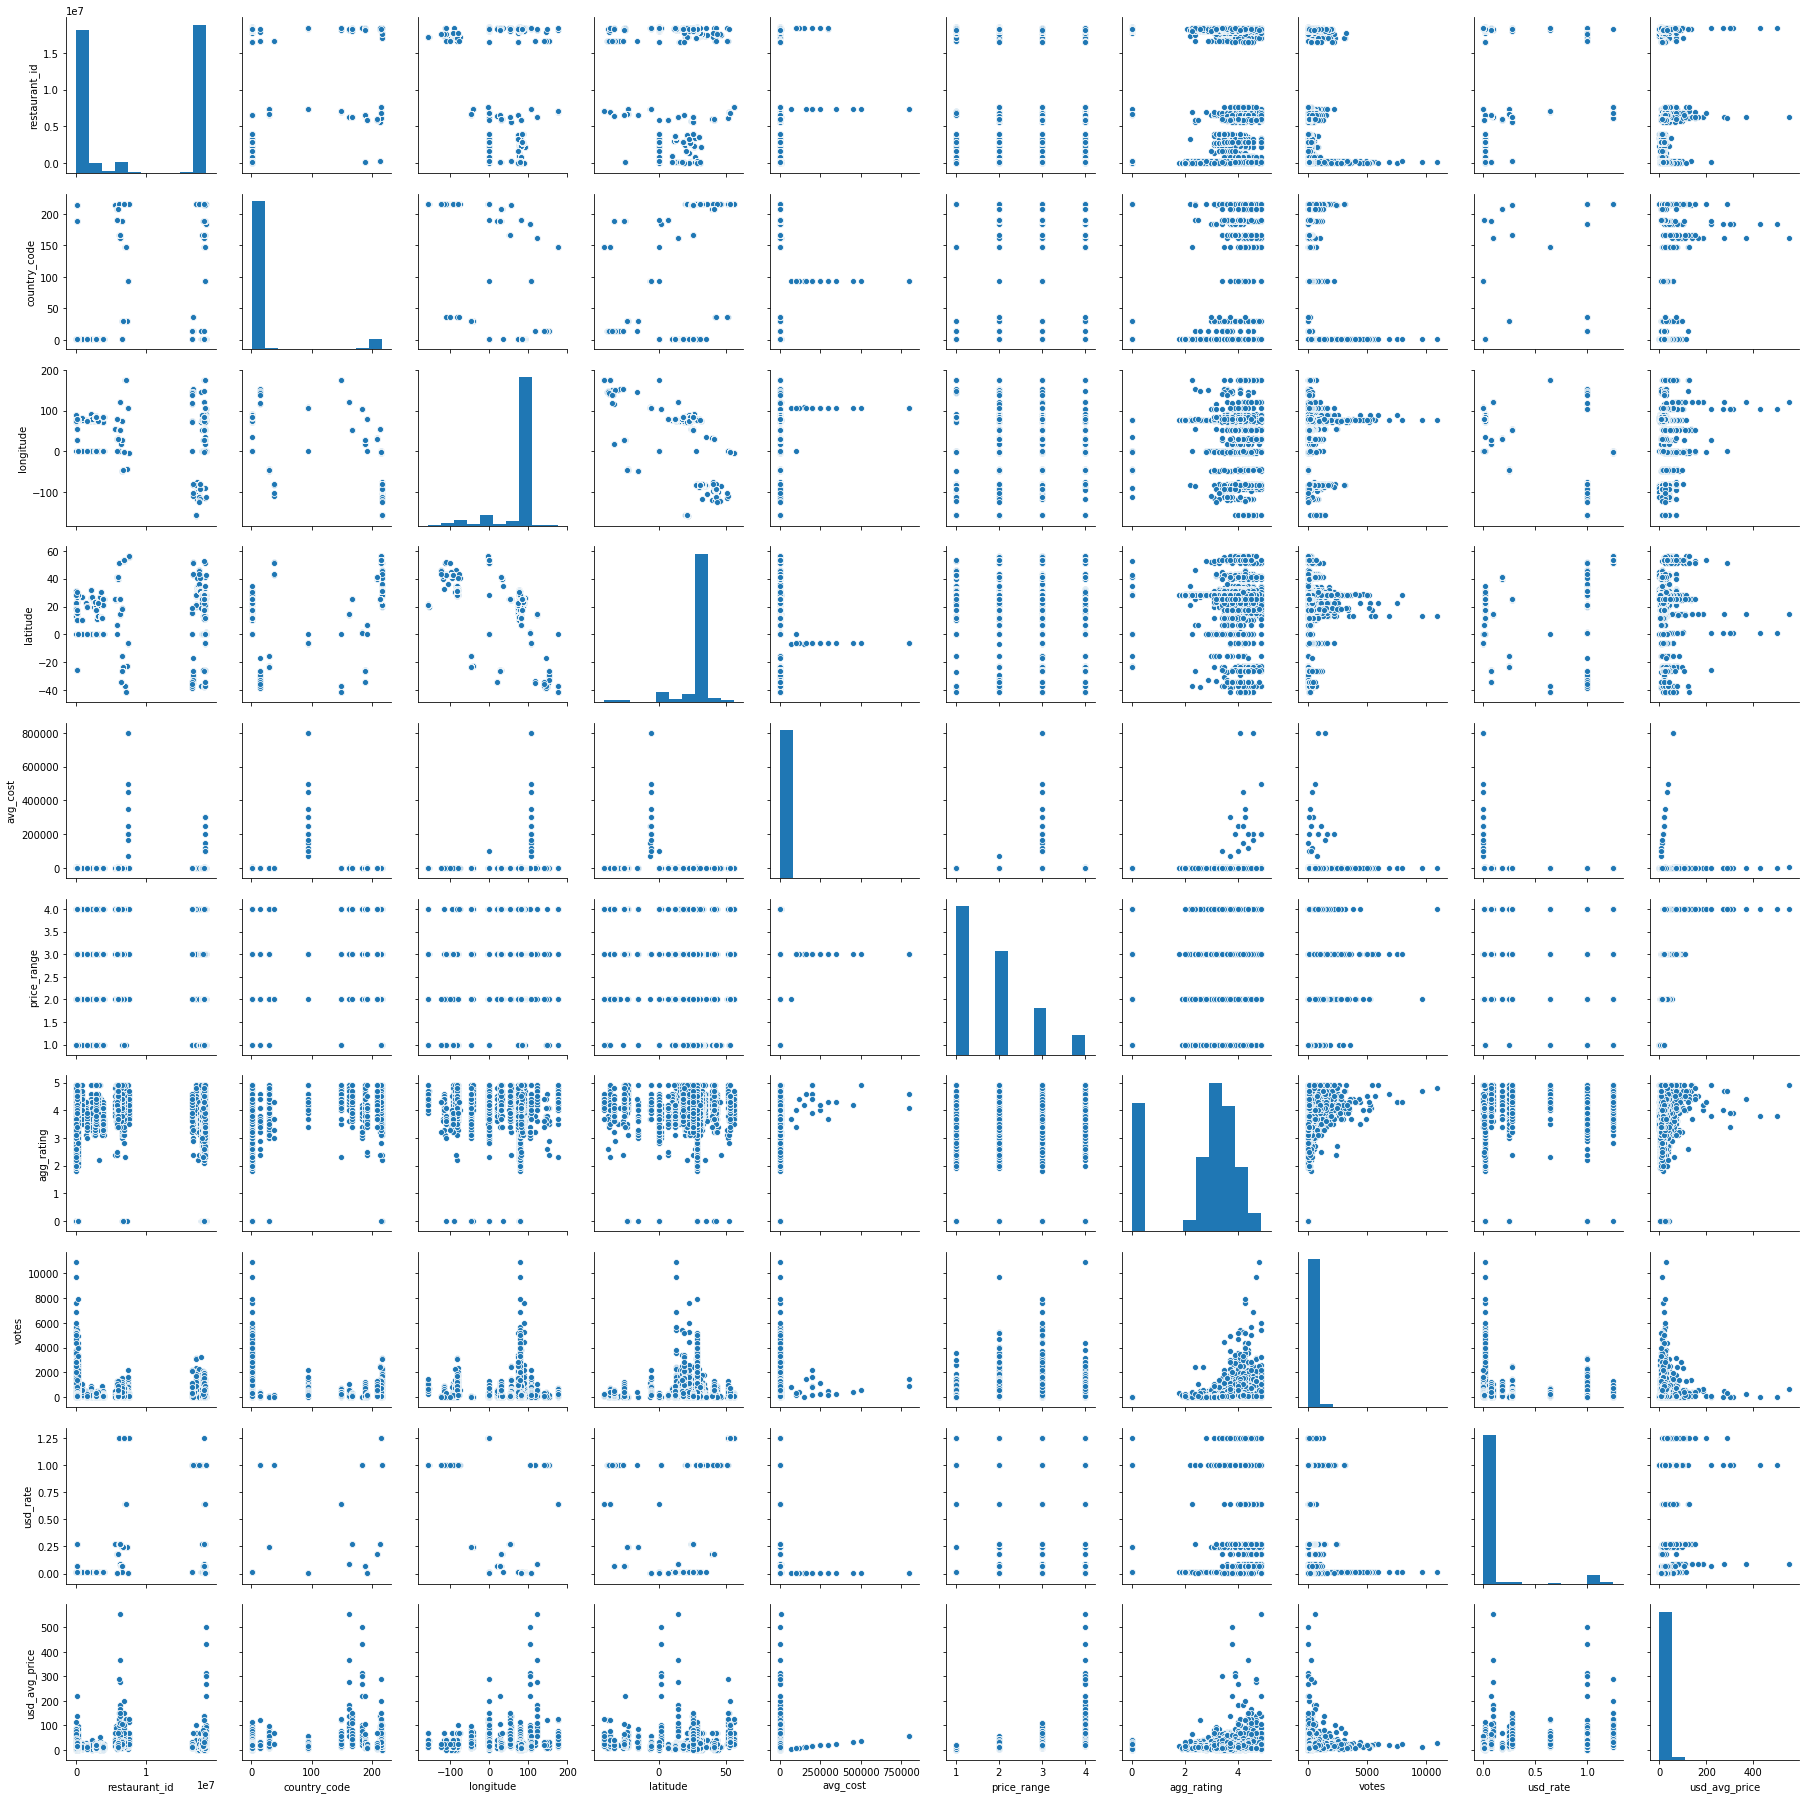

In [101]:
sns.pairplot(df);